In [10]:
#Import Dataset
#==============================================
import pandas as pd
URL = "../data/interim/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(URL)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
#ths function gives
def percentage_nan(data: pd.DataFrame):

    columns = list(data.columns)
    percentages = {col:0 for col in columns} # Dictionary Comprehension
    
    for col in columns:
        percentages[col] = 100*data[col].isna().sum()/len(data.index)
        
    
    return percentages
#function summoner
percentage_nan(df)

{'id': 0.0,
 'gender': 0.0,
 'age': 0.0,
 'hypertension': 0.0,
 'heart_disease': 0.0,
 'ever_married': 0.0,
 'work_type': 0.0,
 'Residence_type': 0.0,
 'avg_glucose_level': 0.0,
 'bmi': 3.9334637964774952,
 'smoking_status': 0.0,
 'stroke': 0.0}

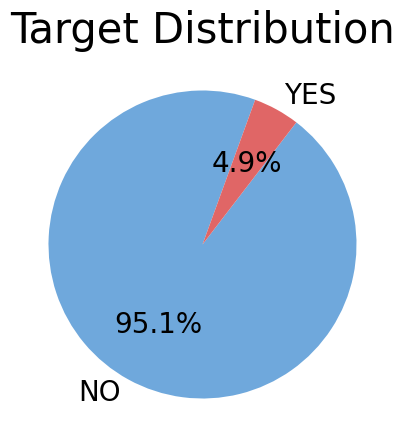

In [29]:
import matplotlib.pyplot as plt
# Target Values distribution
target_dict = {1:"YES", 0:"NO"}
target_counts = df['stroke'].value_counts()

target_counts = target_counts.rename(index = target_dict)
target_counts

colors = ["#6fa8dc","#e06666"]

plt.figure(figsize=(5,5))
plt.pie(target_counts, labels = target_counts.index, autopct="%.1f%%", textprops = {"fontsize":20}, colors= colors, startangle = 70) 
plt.title("Target Distribution", fontsize=30)
plt.show()

/tmp/ipykernel_27393/2360825617.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<AxesSubplot: title={'center': 'Variable Correlation'}>

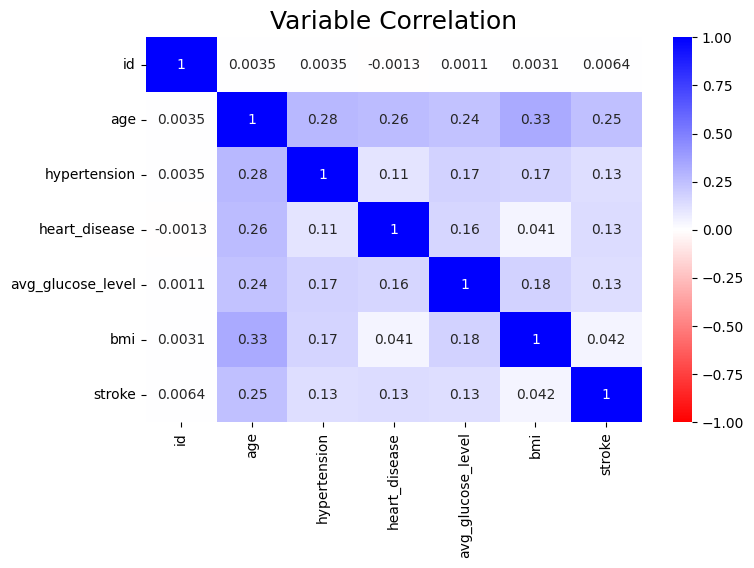

In [40]:
import seaborn as sns
# Variable Correlation
correlation=df.corr()
plt.figure(figsize=(8,5))
plt.title("Variable Correlation", size=18)
sns.heatmap(correlation, cmap="bwr_r",vmin=-1,vmax=1, annot = True)
